# Reviewing multiple regression

Reviewing multiple regression, for things. I'm not learning Python or Jupyter here actually, but just prepping my statistics but I'll make a notebook anyway.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn

sns.set()
%matplotlib inline

## Air quality underground

![](https://onlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/08multiple/bank_swallow/index.png)

Looking at [this underground air quality example of burrowing swallows](https://onlinecourses.science.psu.edu/stat501/node/285). Four different oxygen levels 13%, 15%, 17% and 19%, and carbon dioxide levels of 0%, 3%, 4.5% and 5%. Total *n*=120 nestling bank swallows, 6 for each condition.

* Dependent variable $y$ (*Vent*): percentage increase in "minute ventilation", ie. total volume of air breathed
* Potential predictor $x_1$ (*O2*): percentage of oxygen in the aird the baby birds breath
* Potential predictor $x_2$ (*CO2*): percentage of carbon dioxide the baby birds breath.

In [2]:
try:
    airquality = pd.read_csv('https://onlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/babybirds/index.txt', sep='\t')
except:
    airquality = pd.read_csv('babybirds.txt', sep='\t')

In [3]:
airquality.shape, airquality.columns

((120, 3), Index(['Vent', 'O2', 'CO2'], dtype='object'))

In [4]:
airquality.head()

,Vent,O2,CO2
0,-49,19,0.0
1,0,19,0.0
2,-98,19,0.0
3,148,19,0.0
4,49,19,0.0


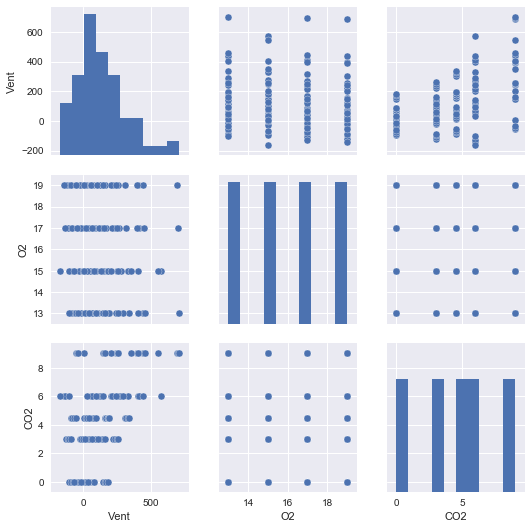

In [5]:
sns.pairplot(airquality)

Observations:

* Doesn't seem to be correlation between minute ventilation *Vent* and percentage of oxygen *O2*
* The relationship between minute ventilation *Vent* and percentage of carbon dioxide *CO2* appears to be curved and with increasing error variance
* The plot between percentage of oxygen *O2* and percentage of carbon dioxide CO2 is the classical appearange of a scatter plot for the experimental conditions. The plot suggests that there is no correlation at all between these two variables. Se see that there are 4 levels of O2, and 5 levels of CO2, and $4 * 5 = 20$ experimental conditions

## With `statsmodels`

Note the constants added... funny that it wouldn't be included somehow actually.

In [6]:
X = airquality[['O2', 'CO2']]
y = airquality['Vent']
X = sm.add_constant(X)

In [7]:
smmodel = sm.OLS(y, X).fit()
smpredictions = smmodel.predict(X)

In [8]:
smmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Vent   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     21.44
Date:                Fri, 08 Jun 2018   Prob (F-statistic):           1.17e-08
Time:                        16:28:46   Log-Likelihood:                -775.79
No. Observations:                 120   AIC:                             1558.
Df Residuals:                     117   BIC:                             1566.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.9008    106.006      0.810      0.419    -124.039     295.841
O2            -5.3300      6.425     -0.830      0.408     -18.054       7.394
CO2           31.1028      4.789      6.495      0.000      21.619      40.586
==============================================================================
Omnibus:                        1.505   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.022
Skew:                           0.120   Prob(JB):                        0.600
Kurtosis:                       3.383   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## With Sklearn

Remember the Scikit-Learn estimator API [routine](https://github.com/jakevdp/PythonDataScienceHandbook/blob/599aa0fe3f882c0001670e676e5a8d43b92c35fc/notebooks/05.02-Introducing-Scikit-Learn.ipynb):

1. Choose a model class by importing
1. Choose model hyperparameters by instantiating the class
1. Arrange data to predictor matrix and target vector
1. Fit model with `fit()`
1. Apply model to new data with `predict()`

In [9]:
X = airquality[['O2', 'CO2']]
y = airquality['Vent']

In [10]:
import sklearn.linear_model
sklm = sklearn.linear_model.LinearRegression()
skmodel = sklm.fit(X, y)
skpredictions = sklm.predict(X)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Evaluation, with looking at $R^2$

In [11]:
skmodel.score(X, y)

0.2681776850791354

and the coefficients and intercept

In [12]:
skmodel.coef_, skmodel.intercept_

(array([-5.33      , 31.10277778]), 85.90083333333347)

Let's take a look at the two predictor variables on their own, against the independent variable.

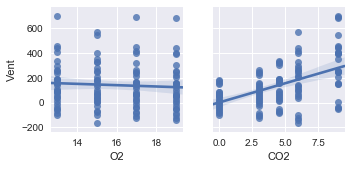

In [13]:
sns.pairplot(airquality, x_vars=X.columns, y_vars=y.name, kind='reg')

Residual plot for the sklearn model. Seaborn also has `residplot()`, but is is just for simple linear models? Anyway we would like this plot to be a random, horizontal band.

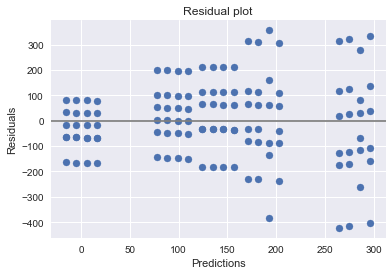

In [14]:
fig, ax = plt.subplots()
ax.scatter(skmodel.predict(X), skmodel.predict(X) - y)
ax.axhline(y=0, c="gray")
ax.set_title("Residual plot")
ax.set_xlabel("Predictions")
ax.set_ylabel("Residuals");